In [1]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
rating=pd.read_csv("ratings_data.txt")
trust=pd.read_csv("trust_data.txt")

In [3]:
rating.columns

Index(['ratings_data.txt'], dtype='object')

In [4]:
rating

,ratings_data.txt
0,1 101 5
1,1 102 3
2,1 10 3
3,1 103 5
4,1 104 2
...,...
664819,49289 3862 4
664820,49289 3939 5
664821,49289 60213 4
664822,49289 62722 4


In [5]:
# example
s="a b c"
str(s).split()

['a', 'b', 'c']

In [6]:
split_data=rating["ratings_data.txt"].apply(lambda x : str(x).split(" "))

In [7]:
split_data

0               [1, 101, 5]
1               [1, 102, 3]
2                [1, 10, 3]
3               [1, 103, 5]
4               [1, 104, 2]
                ...        
664819     [49289, 3862, 4]
664820     [49289, 3939, 5]
664821    [49289, 60213, 4]
664822    [49289, 62722, 4]
664823                [nan]
Name: ratings_data.txt, Length: 664824, dtype: object

In [8]:
k=np.zeros((664823,3))
for i in range(664823):
    
    for j in range(3):
            
            k[i,j]=int(split_data[i][j])
        
        

In [9]:
ratings=pd.DataFrame(k,columns=["user_id","item_id","rating_value"])
ratings.head()

,user_id,item_id,rating_value
0,1.0,101.0,5.0
1,1.0,102.0,3.0
2,1.0,10.0,3.0
3,1.0,103.0,5.0
4,1.0,104.0,2.0


In [10]:
ratings.shape

(664823, 3)

##### using collabrative filtering

In [11]:
# A reader is still needed but only the rating_scale param is required.
# The Reader class is used to parse a file containing ratings.
from surprise import Reader, Dataset
reader = Reader(rating_scale=(0.5, 5.0))

# The columns must correspond to user id, item id and ratings (in that order).
data = Dataset.load_from_df(ratings[['user_id', 'item_id', 'rating_value']], reader)
data

##### training svd alogrithm

In [12]:
# Split data into 5 folds

#data.split(n_folds=5)
from surprise.model_selection import cross_validate

from surprise import SVD
from surprise import NMF

# svd
algo = SVD()
svd_t=cross_validate(algo, data, measures=['MSE','RMSE'],cv=5)
print(svd_t)

{'test_mse': array([1.11925125, 1.11837283, 1.1200047 , 1.11721662, 1.11937373]), 'test_rmse': array([1.05794671, 1.05753148, 1.05830275, 1.05698468, 1.0580046 ]), 'fit_time': (50.52821135520935, 47.956716537475586, 46.09270119667053, 44.09803891181946, 48.52419590950012), 'test_time': (1.803896188735962, 1.3324360847473145, 1.1279821395874023, 1.1439719200134277, 1.57778000831604)}


#### prediction of the rating

In [13]:
algo.predict(6,50,4)

Prediction(uid=6, iid=50, r_ui=4, est=4.126246398443194, details={'was_impossible': False})

In [14]:
# nmf
algo = NMF()
nmf_t=cross_validate(algo, data, measures=['MSE','RMSE'],cv=5)
print(nmf_t)

{'test_mse': array([1.38072605, 1.38496488, 1.38930305, 1.38785053, 1.37612783]), 'test_rmse': array([1.175043  , 1.17684531, 1.178687  , 1.17807068, 1.17308475]), 'fit_time': (63.17952585220337, 90.88209438323975, 82.93975758552551, 87.78571057319641, 94.07032537460327), 'test_time': (1.4728412628173828, 1.8871307373046875, 0.9961807727813721, 2.315703868865967, 1.5311956405639648)}


In [15]:
algo.predict(1,302,4)

Prediction(uid=1, iid=302, r_ui=4, est=1.8438515186491107, details={'was_impossible': False})

In [16]:
ratings.head()

,user_id,item_id,rating_value
0,1.0,101.0,5.0
1,1.0,102.0,3.0
2,1.0,10.0,3.0
3,1.0,103.0,5.0
4,1.0,104.0,2.0


In [17]:
ratings=ratings[ratings["user_id"]<20000]

In [18]:
m=ratings[["user_id","item_id"]].groupby(["user_id"])['item_id'].count()

In [19]:
m1=m.sort_values(ascending=False).iloc[:10,]
m1

user_id
65.0      1023
2081.0     907
341.0      901
282.0      891
181.0      884
375.0      883
776.0      860
517.0      832
1071.0     811
432.0      732
Name: item_id, dtype: int64

##### top 10 users who buys more items

In [20]:
m1.keys()

Float64Index([65.0, 2081.0, 341.0, 282.0, 181.0, 375.0, 776.0, 517.0, 1071.0,
              432.0],
             dtype='float64', name='user_id')

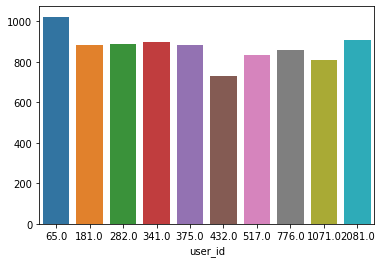

In [21]:
sns.barplot(x=m1.keys(),y=m1.values)

#### epision
##### source_user_id target_user_id trust_statement_value

In [22]:
trust.head()

,trust_data.txt
0,22605 5052 1
1,22605 42913 1
2,22605 18420 1
3,22605 42914 1
4,22605 22621 1


In [23]:
split_data_trust=trust["trust_data.txt"].apply(lambda x : str(x).split(" ")[-3:])

In [24]:
k1=np.zeros((487182,3))
for i in range(487182):
    
    for j in range(0,3):
            
            k1[i,j]=split_data_trust[i][j]
        
        

In [25]:
trust_user=pd.DataFrame(k1,columns=['user_id','target_user_id','trust_statement_value'])

In [26]:
trust_user.head()

,user_id,target_user_id,trust_statement_value
0,22605.0,5052.0,1.0
1,22605.0,42913.0,1.0
2,22605.0,18420.0,1.0
3,22605.0,42914.0,1.0
4,22605.0,22621.0,1.0


In [27]:
trust_user=trust_user[trust_user["user_id"]<20000]

#### caio 

In [28]:
caio_rating=pd.read_csv("review-ratings.txt",names=['user_id','movie','rating'])

In [29]:
caio_rating.head()

,user_id,movie,rating
0,4064,21,3
1,931,27,4
2,1869,41,3
3,44,17,3
4,9370,26,4


In [30]:
caio_rating.shape

(1625480, 3)

In [31]:
caio_trust=pd.read_csv("trusts.txt",names=['user_id','trus_id','rating'])

Text(0.5, 1.0, 'epision')

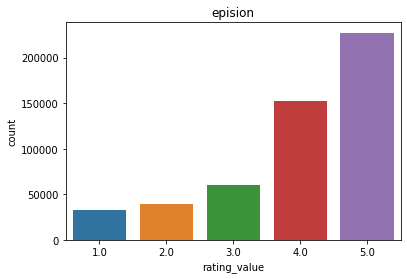

In [32]:
sns.countplot(ratings["rating_value"])
plt.title("epision")

Text(0.5, 1.0, 'Caio')

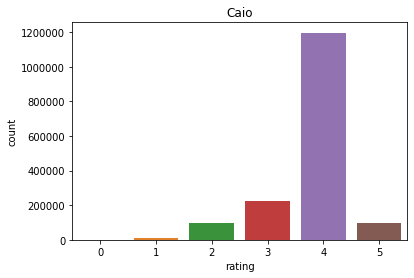

In [33]:
sns.countplot(caio_rating['rating'])
plt.title("Caio")

In [34]:
ratings.shape

(512773, 3)

In [35]:
total=ratings.merge(trust_user,on="user_id",how="inner")

In [36]:
total.head()

,user_id,item_id,rating_value,target_user_id,trust_statement_value
0,1.0,101.0,5.0,384.0,1.0
1,1.0,101.0,5.0,215.0,1.0
2,1.0,101.0,5.0,140.0,1.0
3,1.0,101.0,5.0,310.0,1.0
4,1.0,101.0,5.0,95.0,1.0


In [37]:
total.shape

(31084093, 5)

In [38]:
ratings

,user_id,item_id,rating_value
0,1.0,101.0,5.0
1,1.0,102.0,3.0
2,1.0,10.0,3.0
3,1.0,103.0,5.0
4,1.0,104.0,2.0
...,...,...,...
512768,19999.0,150.0,4.0
512769,19999.0,21798.0,5.0
512770,19999.0,3196.0,5.0
512771,19999.0,65366.0,5.0


In [39]:
x=ratings.iloc[:,[0,2]]
y=ratings.iloc[:,1]

In [40]:
x.head()

,user_id,rating_value
0,1.0,5.0
1,1.0,3.0
2,1.0,3.0
3,1.0,5.0
4,1.0,2.0


In [41]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [43]:
from sklearn.ensemble import RandomForestRegressor

In [44]:
model=RandomForestRegressor()
model.fit(x_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [45]:
y_predict=model.predict(x_test)

In [47]:
from sklearn.metrics import r2_score

##### item recommendataion

In [56]:
import math
math.ceil(model.predict(np.array([367.0,5.0]).reshape(1,-1)))

25451

#### predict using joblib file

In [59]:
# save the model to disk
import joblib
filename = 'novelmodel.sav'
joblib.dump(model, filename)
 
# some time later...
 
# load the model from disk
loaded_model = joblib.load(filename)
result = loaded_model.score(x_test, y_test)
print(result)

0.06477930888431094


In [61]:
math.ceil(loaded_model.predict(np.array([367.0,5.0]).reshape(1,-1)))

25451